In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

%matplotlib inline

In [54]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d4b9709657224246a956a1697e212b17 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='jAopSrAi1nr01XCHFtczo480I1AjE9LHonDiBc9q1xRX',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d4b9709657224246a956a1697e212b17.get_object(Bucket='p5-donotdelete-pr-wmumkhluvkhvnb',Key='titanic.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_titanic = pd.read_csv(body)
df_titanic.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [55]:
df_titanic.info()
df_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


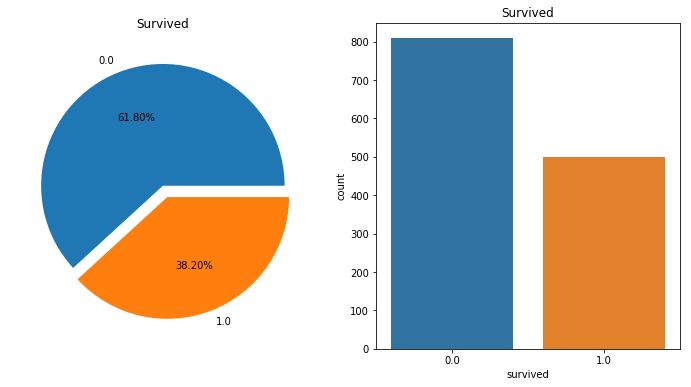

In [56]:
f,ax=plt.subplots(1,2,figsize=(12,6))

df_titanic['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=df_titanic,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [57]:
df_titanic['survived'].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

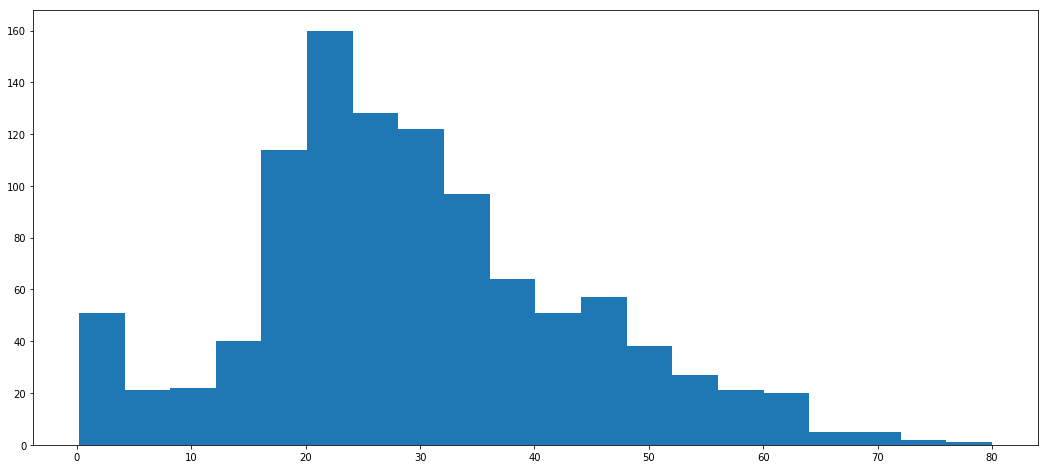

In [58]:
df_titanic['age'].hist(bins=20,figsize=(18,8),grid=False);

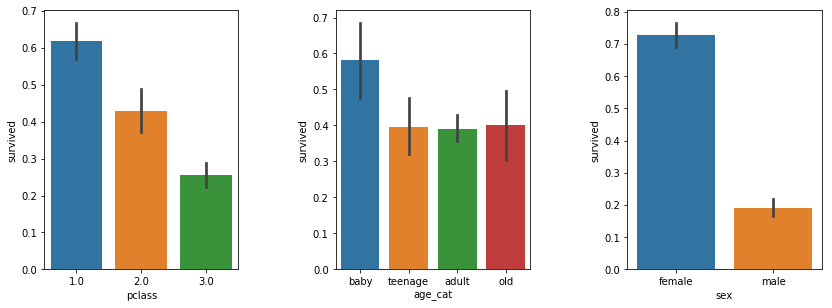

In [59]:
df_titanic['age_cat'] = pd.cut(df_titanic['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[12,4])
plt.subplot(131)
sns.barplot('pclass', 'survived', data=df_titanic)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=df_titanic)
plt.subplot(133)
sns.barplot('sex', 'survived', data=df_titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

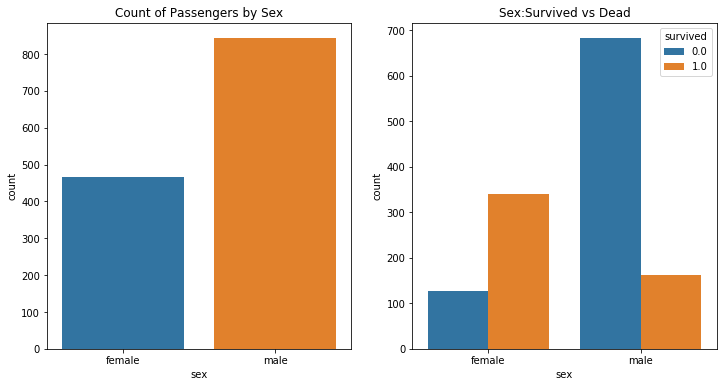

In [60]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot('sex',data=df_titanic, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=df_titanic, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [61]:
df_titanic.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
age_cat       264
dtype: int64

In [62]:
# null이 실제로 몇 번 row에 있는지 확인한다
print("Rows where fare value is missing:")
df_titanic[df_titanic['fare'].isnull()]

Rows where fare value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
1225,3.0,0.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,261.0,NaN,old
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
print("Rows where age value is missing:")
df_titanic[df_titanic['age'].isnull()]

Rows where age value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
15,1.0,0.0,"Baumann, Mr. John D",male,NaN,0.0,0.0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY",NaN
37,1.0,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0.0,0.0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA",NaN
40,1.0,0.0,"Brewe, Dr. Arthur Jackson",male,NaN,0.0,0.0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",NaN
46,1.0,0.0,"Cairns, Mr. Alexander",male,NaN,0.0,0.0,113798,31.0000,NaN,S,NaN,NaN,NaN,NaN
59,1.0,1.0,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0.0,0.0,17770,27.7208,NaN,C,5,NaN,"New York, NY",NaN
69,1.0,1.0,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0.0,1.0,113505,55.0000,E33,S,6,NaN,"St Leonards-on-Sea, England Ohio",NaN
70,1.0,0.0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0.0,0.0,112051,0.0000,NaN,S,NaN,NaN,"Liverpool, England / Belfast",NaN
74,1.0,0.0,"Clifford, Mr. George Quincy",male,NaN,0.0,0.0,110465,52.0000,A14,S,NaN,NaN,"Stoughton, MA",NaN
80,1.0,0.0,"Crafton, Mr. John Bertram",male,NaN,0.0,0.0,113791,26.5500,NaN,S,NaN,NaN,"Roachdale, IN",NaN
106,1.0,0.0,"Farthing, Mr. John",male,NaN,0.0,0.0,PC 17483,221.7792,C95,S,NaN,NaN,NaN,NaN


In [64]:
# 중요! - 데이터 정제2 - 컬럼값이 NULL이 아닌 것만 필터링
df_titanic = df_titanic[df_titanic['age'].notna()]
df_titanic = df_titanic[df_titanic['fare'].notna()]
df_titanic.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       2
boat         628
body         926
home.dest    360
age_cat        0
dtype: int64

In [65]:
print("Rows where fare value is missing:")
df_titanic[df_titanic['fare'].isnull()]

Rows where fare value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat


In [66]:
print("Rows where age value is missing:")
df_titanic[df_titanic['age'].isnull()]

Rows where age value is missing:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat


In [67]:
df_titanic.sex.dtype

dtype('O')

In [68]:
# sex를 문자열에서 정수로 변경하는 함수를 정의. LabelEncoder.fit()은 알파벳의 순서로 sort해서 encoding한다
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["sex"]=le.transform(data["sex"]) 
    return data

In [69]:
# sex를 문자열에서 정수로 변경하는 함수를 정의
df_titanic = sex_to_int(df_titanic)
df_titanic.sex.dtype

dtype('int64')

In [70]:
x_data = df_titanic.values[:, [0,3,4,5,6,8]]
y_data = df_titanic.values[:, [1]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)

In [71]:
x_data

array([[1.0, 0, 29.0, 0.0, 0.0, 211.3375],
       [1.0, 1, 0.9167, 1.0, 2.0, 151.55],
       [1.0, 0, 2.0, 1.0, 2.0, 151.55],
       ...,
       [3.0, 1, 26.5, 0.0, 0.0, 7.225],
       [3.0, 1, 27.0, 0.0, 0.0, 7.225],
       [3.0, 1, 29.0, 0.0, 0.0, 7.875]], dtype=object)

In [72]:
y_data

array([[1.0],
       [1.0],
       [0.0],
       ...,
       [0.0],
       [0.0],
       [0.0]], dtype=object)

In [73]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  1.13.1
keras version :  2.2.4


In [74]:
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense((1), activation='sigmoid'))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 255)               1785      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 256       
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


Train on 940 samples, validate on 105 samples
Epoch 1/10
940/940 [==============================] - 5s 6ms/step - loss: 0.2836 - acc: 0.6181 - val_loss: 0.2088 - val_acc: 0.7333
Epoch 2/10
940/940 [==============================] - 7s 7ms/step - loss: 0.2050 - acc: 0.6851 - val_loss: 0.1892 - val_acc: 0.7238
Epoch 3/10
940/940 [==============================] - 8s 8ms/step - loss: 0.2047 - acc: 0.6989 - val_loss: 0.2100 - val_acc: 0.6857
Epoch 4/10
940/940 [==============================] - 9s 9ms/step - loss: 0.1924 - acc: 0.7011 - val_loss: 0.1905 - val_acc: 0.7524
Epoch 5/10
940/940 [==============================] - 10s 11ms/step - loss: 0.1809 - acc: 0.7394 - val_loss: 0.1770 - val_acc: 0.8000
Epoch 6/10
940/940 [==============================] - 12s 12ms/step - loss: 0.1759 - acc: 0.7489 - val_loss: 0.1707 - val_acc: 0.7714
Epoch 7/10
940/940 [==============================] - 12s 12ms/step - loss: 0.1752 - acc: 0.7415 - val_loss: 0.1731 - val_acc: 0.7524
Epoch 8/10
940/940 [====

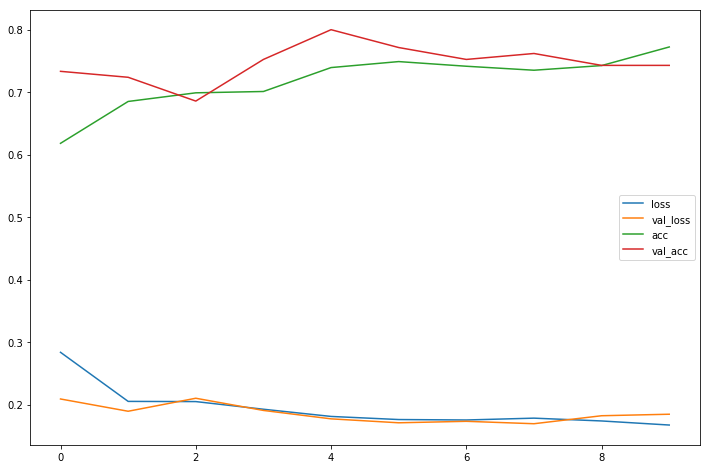

In [75]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.show()

In [76]:
dicaprio = np.array([3., 1., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 0., 17., 1., 2., 100.]).reshape(1,6)

In [77]:
model.predict(dicaprio)

array([[0.09616153]], dtype=float32)

In [78]:
model.predict(winslet)

array([[0.7150391]], dtype=float32)